# Кластеризация ЕГЭ (8.5 если сделаны все задачи)

Рядом лежат экселевские таблицы с координатами точек. В 3 и 4 задаче используется манхетеское расстояние. В остальных Евклидово.

* Постройте Распределение точек
* Кластеризуйте руками
* Постройте Распределение точек, отметьте принадлежность кластеров цветами
* Найдите среди в каждом кластере точку расстояние от которой до всех остальных минимально
* Выведите усреднение центров всех кластеров * 1000

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist, pdist, squareform

def euclidean_distance_matrix(points):
    return squareform(pdist(points, metric='euclidean'))

def manhattan_distance_matrix(points):
    return squareform(pdist(points, metric='cityblock'))

def find_central_point(cluster_points, distance_metric='euclidean'):
    if distance_metric == 'euclidean':
        dist_matrix = euclidean_distance_matrix(cluster_points)
    else:
        dist_matrix = manhattan_distance_matrix(cluster_points)

    sum_distances = dist_matrix.sum(axis=1)
    min_idx = sum_distances.argmin()

    return cluster_points[min_idx], sum_distances[min_idx]

def manual_clustering(points, n_clusters=3, distance_metric='euclidean', max_iter=100):
    np.random.seed(42)
    centroids = points[np.random.choice(len(points), n_clusters, replace=False)]

    for i in range(max_iter):
        if distance_metric == 'euclidean':
            distances = cdist(points, centroids, metric='euclidean')
        else:
            distances = cdist(points, centroids, metric='cityblock')
        labels = distances.argmin(axis=1)
        new_centroids = []
        for j in range(n_clusters):
            cluster_points = points[labels == j]
            if len(cluster_points) > 0:
                new_centroids.append(cluster_points.mean(axis=0))
            else:
                new_centroids.append(centroids[j])

        new_centroids = np.array(new_centroids)

        if np.allclose(centroids, new_centroids, rtol=1e-4):
            break

        centroids = new_centroids

    return labels, centroids

In [78]:
def claster(df, distance_metric = 'euclidean', table_num = '', n_clusters = 1):
    if 'X' in df.columns and 'Y' in df.columns:
        points = df[['X', 'Y']].values
    else:
        numeric_cols = df.select_dtypes(include=[np.number]).columns
        points = df[numeric_cols[:2]].values
    print(f"{len(points)} точек")

    plt.figure(figsize=(15, 4))

    plt.subplot(1, 3, 1)
    plt.scatter(points[:, 0], points[:, 1], s=30, alpha=0.6, edgecolors='k')
    plt.title(f'Таблица {table_num}: Исходное распределение точек')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True, alpha=0.3)


    labels, centroids = manual_clustering(points, n_clusters=n_clusters, distance_metric=distance_metric)

    plt.subplot(1, 3, 2)
    colors = plt.cm.tab10(np.linspace(0, 1, n_clusters))

    for i in range(n_clusters):
        cluster_points = points[labels == i]
        if len(cluster_points) > 0:
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, alpha=0.7, color=colors[i], edgecolors='k', label=f'Кластер {i + 1}')

    plt.title(f'Таблица {table_num}: Кластеризация')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.legend()
    plt.grid(True, alpha=0.3)

    central_points = []
    central_distances = []

    for i in range(n_clusters):
        cluster_points = points[labels == i]
        if len(cluster_points) > 0:
            central_point, min_distance = find_central_point(cluster_points, distance_metric=distance_metric)
            central_points.append(central_point)
            central_distances.append(min_distance)

            print(f"  Кластер {i + 1}:")
            print(f"    Кол-тво точек: {len(cluster_points)}")
            print(f"    Центр. точка: ({central_point[0]:.4f}, {central_point[1]:.4f})")
            print(f"    Мин сумма расстояний: {min_distance:.4f}")
        else:
            central_points.append(None)
            central_distances.append(0)
            print(f"  Кластер {i + 1}: пуст")

    plt.subplot(1, 3, 3)

    for i in range(n_clusters):
        cluster_points = points[labels == i]
        if len(cluster_points) > 0:
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], s=30, alpha=0.7, color=colors[i], edgecolors='k', label=f'Кластер {i + 1}')
            if central_points[i] is not None:
                plt.scatter(central_points[i][0], central_points[i][1], s=300, marker='*', c='yellow', edgecolors='k', linewidth=2, label=f'Центр. точка {i + 1}' if i == 0 else "")

    plt.title(f'Таблица {table_num}: Центр. точки в кластерах ({distance_metric})')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()


    avg_center = centroids.mean(axis=0)
    scaled_result = avg_center * 1000

    print(f"\nРезультат:")
    print(f"  Усредненный центр кластеров: ({avg_center[0]:.6f}, {avg_center[1]:.6f})")
    print(f"  *1000: ({scaled_result[0]:.2f}, {scaled_result[1]:.2f})")

100 точек
  Кластер 1:
    Кол-тво точек: 50
    Центр. точка: (2.0339, 5.2893)
    Мин сумма расстояний: 36.1534
  Кластер 2:
    Кол-тво точек: 50
    Центр. точка: (0.0481, 8.0531)
    Мин сумма расстояний: 43.2988


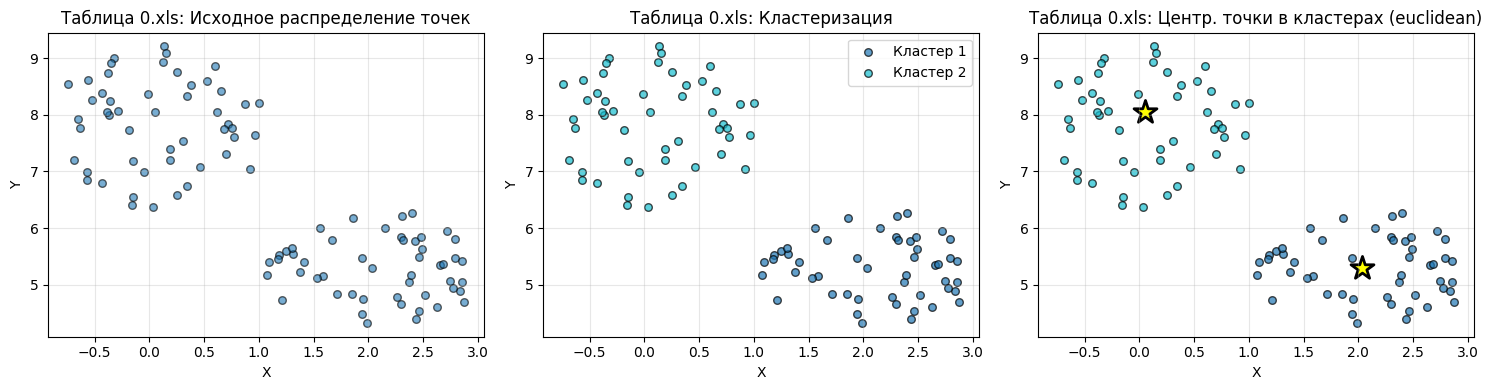


Результат:
  Усредненный центр кластеров: (1.093471, 6.575711)
  *1000: (1093.47, 6575.71)


In [79]:
claster(pd.read_excel("0.xls"), 'euclidean', "0.xls", 2)

9999 точек
  Кластер 1:
    Кол-тво точек: 3333
    Центр. точка: (10.0225, 1.1542)
    Мин сумма расстояний: 2456.7758
  Кластер 2:
    Кол-тво точек: 3333
    Центр. точка: (8.0401, -1.1087)
    Мин сумма расстояний: 3177.1591
  Кластер 3:
    Кол-тво точек: 3333
    Центр. точка: (6.4700, 2.1698)
    Мин сумма расстояний: 3086.3168


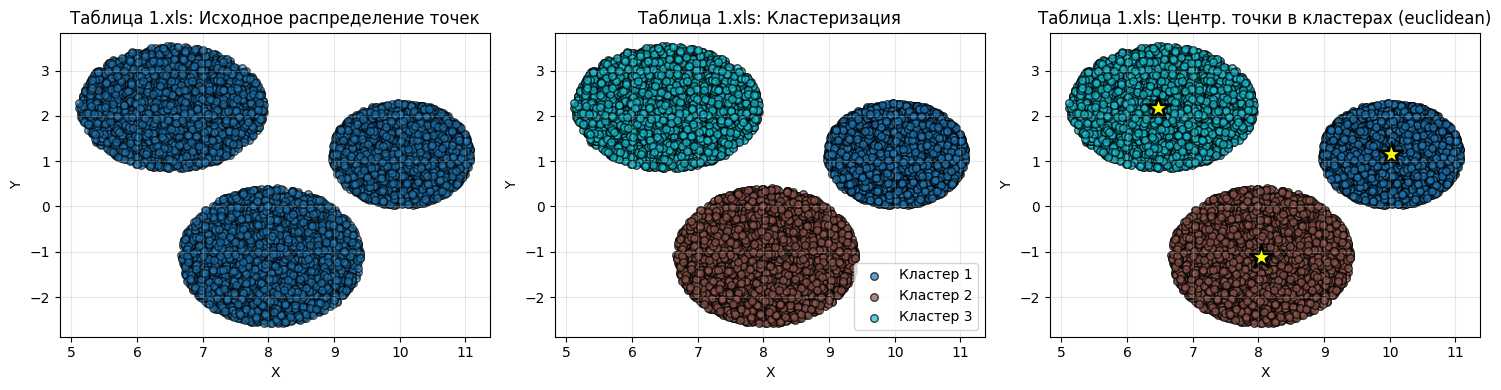


Результат:
  Усредненный центр кластеров: (8.187203, 0.743485)
  *1000: (8187.20, 743.48)


In [80]:
claster(pd.read_excel("1.xls"), 'euclidean', "1.xls", 3)

999 точек
  Кластер 1:
    Кол-тво точек: 524
    Центр. точка: (34.9264, -4.6953)
    Мин сумма расстояний: 3092.4875
  Кластер 2:
    Кол-тво точек: 475
    Центр. точка: (11.3341, 5.9660)
    Мин сумма расстояний: 2811.4686


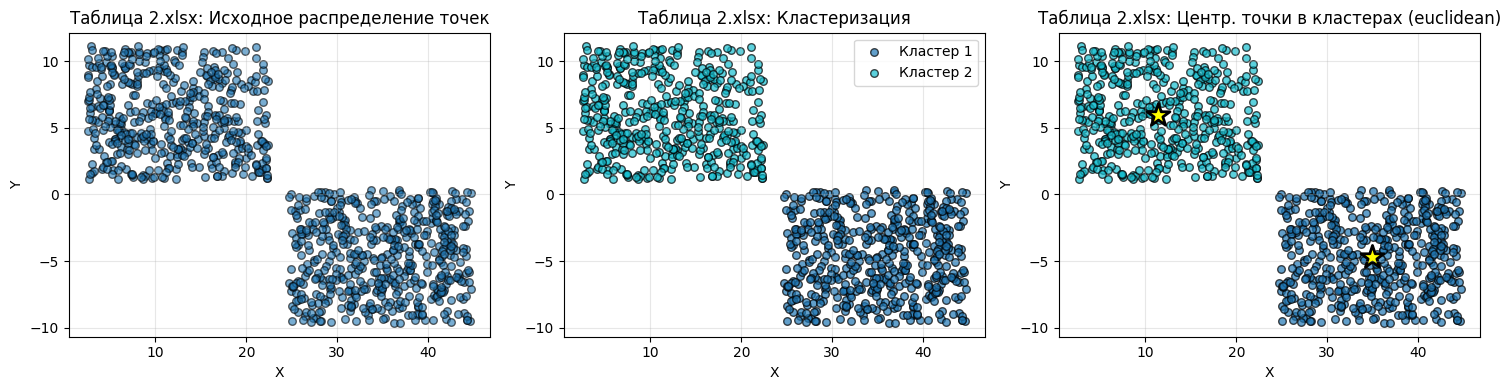


Результат:
  Усредненный центр кластеров: (23.387758, 0.645643)
  *1000: (23387.76, 645.64)


In [81]:
claster(pd.read_excel("2.xlsx"), 'euclidean', "2.xlsx", 2)

9999 точек
  Кластер 1:
    Кол-тво точек: 3287
    Центр. точка: (30.8495, -4.5172)
    Мин сумма расстояний: 24365.7355
  Кластер 2:
    Кол-тво точек: 3428
    Центр. точка: (-25.1308, -14.4133)
    Мин сумма расстояний: 25620.9224
  Кластер 3:
    Кол-тво точек: 3284
    Центр. точка: (3.5179, 4.6537)
    Мин сумма расстояний: 24396.1320


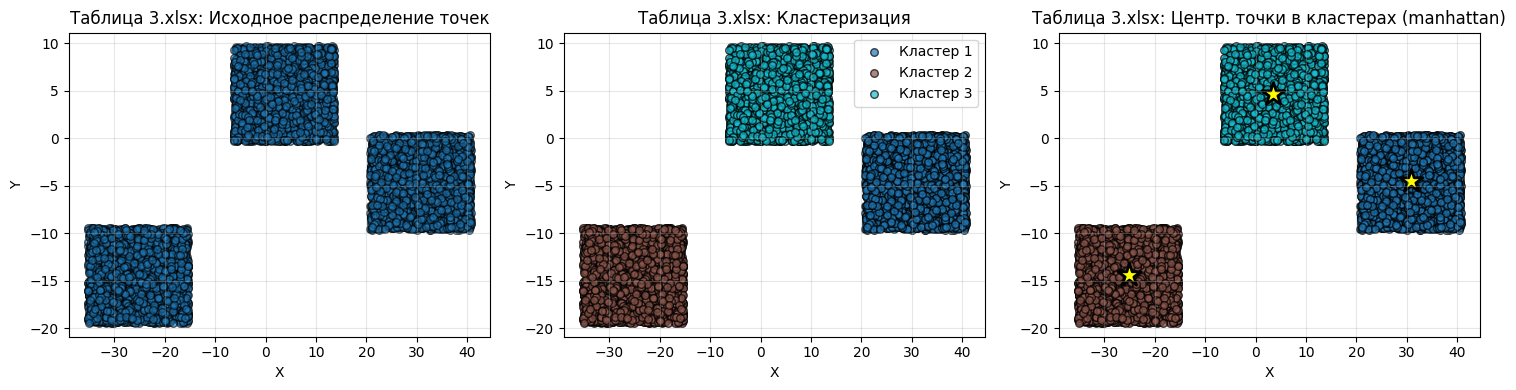


Результат:
  Усредненный центр кластеров: (3.037614, -4.798146)
  *1000: (3037.61, -4798.15)


In [82]:
claster(pd.read_excel("3.xlsx"), 'manhattan', "3.xlsx", 3)

500 точек
  Кластер 1:
    Кол-тво точек: 250
    Центр. точка: (4.4993, 2.5248)
    Мин сумма расстояний: 470.3286
  Кластер 2:
    Кол-тво точек: 250
    Центр. точка: (0.6778, 7.4683)
    Мин сумма расстояний: 460.4683


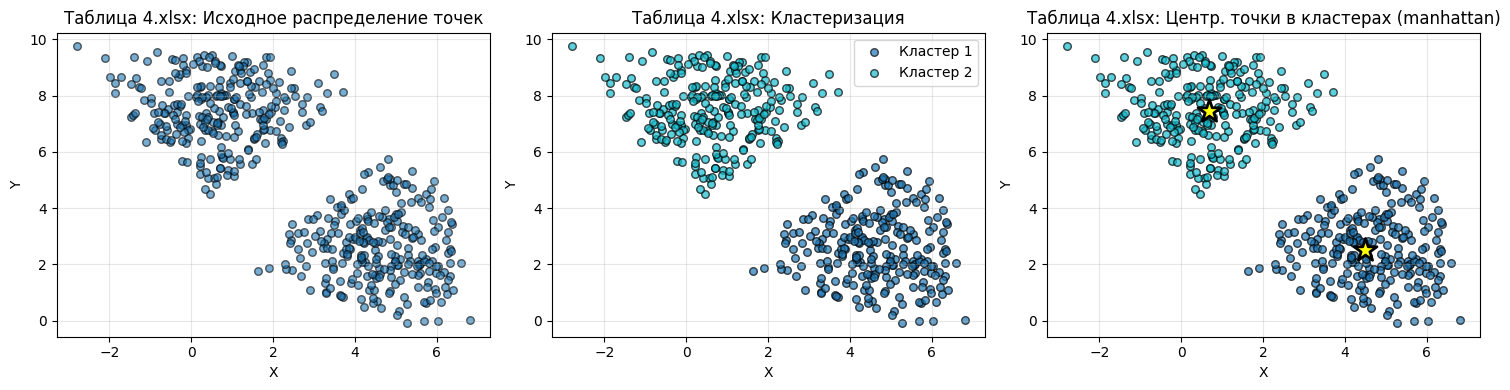


Результат:
  Усредненный центр кластеров: (2.631119, 5.048732)
  *1000: (2631.12, 5048.73)


In [83]:
claster(pd.read_excel("4.xlsx"), 'manhattan', "4.xlsx", 2)

9999 точек
  Кластер 1:
    Кол-тво точек: 3333
    Центр. точка: (3.8586, 2.9072)
    Мин сумма расстояний: 4958.9242
  Кластер 2:
    Кол-тво точек: 3339
    Центр. точка: (-2.7497, 1.1431)
    Мин сумма расстояний: 4522.4469
  Кластер 3:
    Кол-тво точек: 3327
    Центр. точка: (-0.9240, 7.1199)
    Мин сумма расстояний: 4955.9081


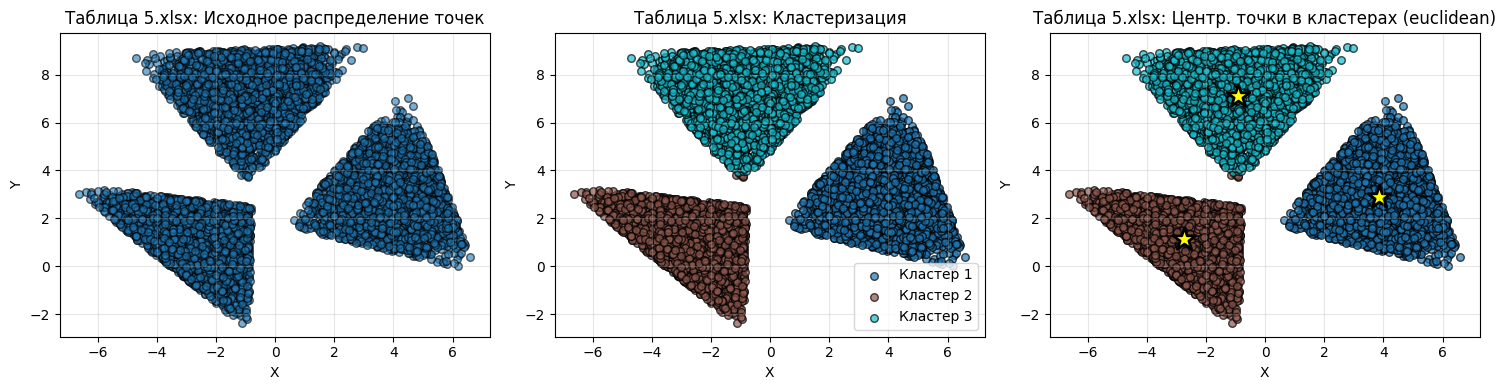


Результат:
  Усредненный центр кластеров: (0.063196, 3.744630)
  *1000: (63.20, 3744.63)


In [84]:
claster(pd.read_excel("5.xlsx"), 'euclidean', "5.xlsx", 3)

# Кластеризация (0.75 за каждый алгоритм на всех данных)

На предложенных распределениях данных проверьте предложенные алгоритмы. Постройте графики кластеризации для каждой пары алгоритм-данные, разные кластеры покрасьте разным цветом. Воспользуйтесь sklearn реализациями. Параметры кластеризации для разных алгоритмов подберите такие, чтобы алгоритмы можно было сравнивать (по возможности одинаковое количество кластеров и т.д.)

In [85]:
import time
import warnings

import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from itertools import cycle, islice

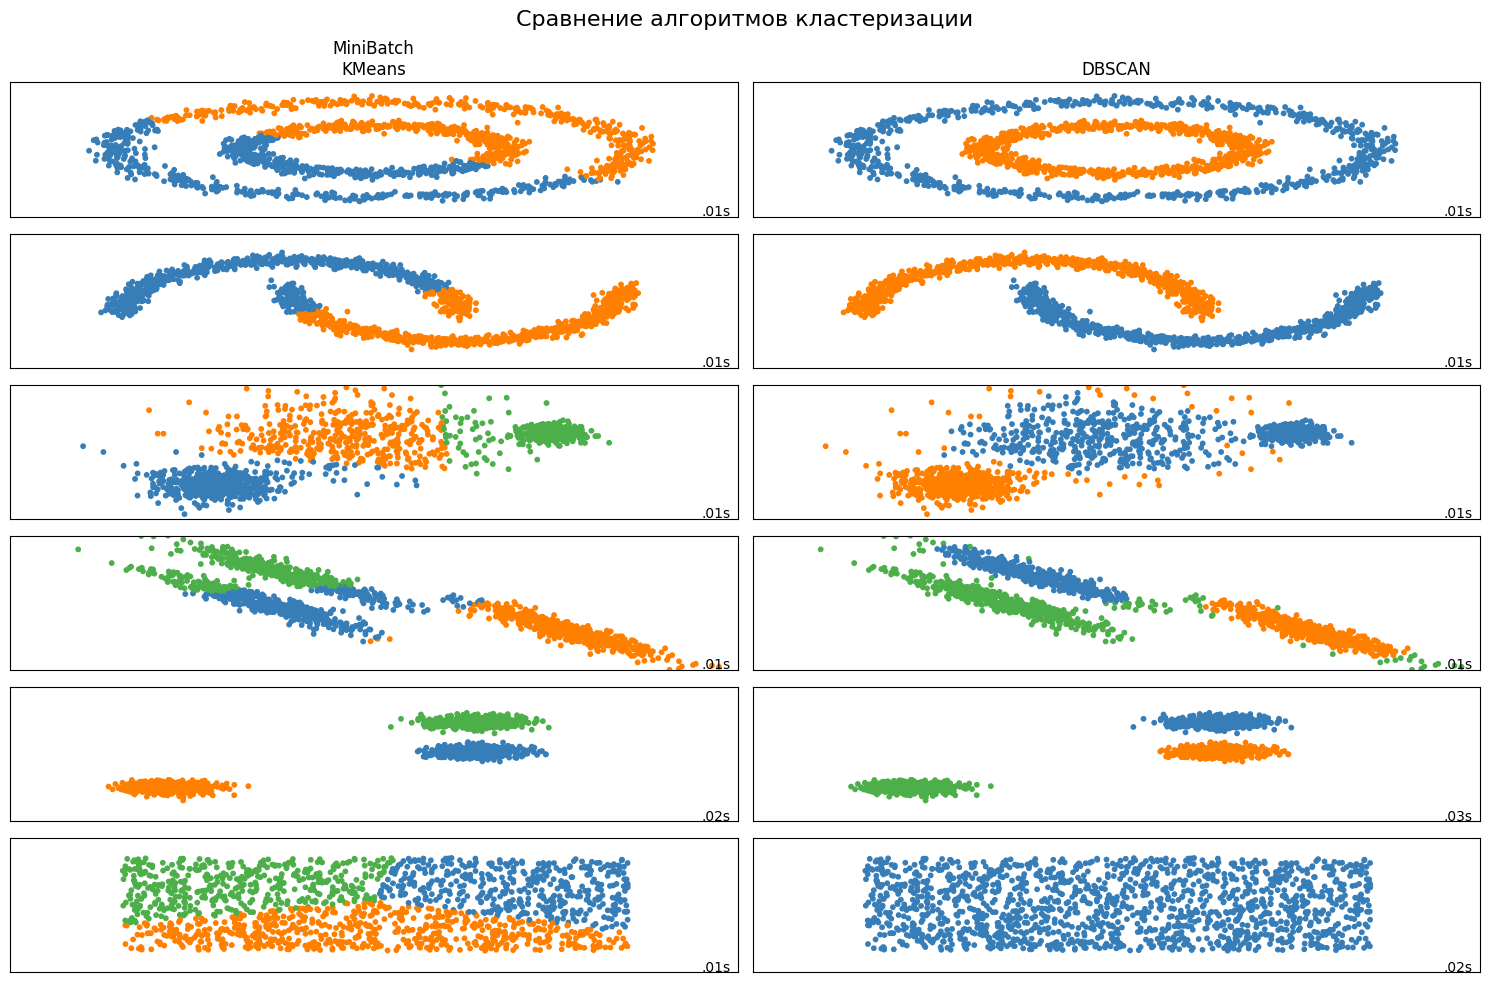

In [86]:
import time
import warnings
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import MiniBatchKMeans, DBSCAN
from itertools import cycle, islice

# Инициализация алгоритмов
two_means = MiniBatchKMeans(n_clusters=3, random_state=42)
dbscan = DBSCAN(eps=0.3, min_samples=10)

clustering_algorithms = (
    ("MiniBatch\nKMeans", two_means),
    ("DBSCAN", dbscan),
)

np.random.seed(0)


n_samples = 1500
noisy_circles = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=0.05)
blobs = datasets.make_blobs(n_samples=n_samples, random_state=8)
no_structure = np.random.rand(n_samples, 2), None


random_state = 170
X, y = datasets.make_blobs(n_samples=n_samples, random_state=random_state)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X_aniso = np.dot(X, transformation)
aniso = (X_aniso, y)


varied = datasets.make_blobs(
    n_samples=n_samples, cluster_std=[1.0, 2.5, 0.5], random_state=random_state
)

default_base = {
    "quantile": 0.3,
    "eps": 0.3,
    "damping": 0.9,
    "preference": -200,
    "n_neighbors": 10,
    "n_clusters": 3,
    "min_samples": 20,
    "xi": 0.05,
    "min_cluster_size": 0.1,
}

datasets_list = [
    (
        noisy_circles,
        {
            "damping": 0.77,
            "preference": -240,
            "quantile": 0.2,
            "n_clusters": 2,
            "min_samples": 20,
            "xi": 0.25,
        },
    ),
    (noisy_moons, {"damping": 0.75, "preference": -220, "n_clusters": 2}),
    (
        varied,
        {
            "eps": 0.18,
            "n_neighbors": 2,
            "min_samples": 5,
            "xi": 0.035,
            "min_cluster_size": 0.2,
        },
    ),
    (
        aniso,
        {
            "eps": 0.15,
            "n_neighbors": 2,
            "min_samples": 20,
            "xi": 0.1,
            "min_cluster_size": 0.2,
        },
    ),
    (blobs, {}),
    (no_structure, {}),
]

plt.figure(figsize=(15, 10))
plot_num = 1

colors = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                     '#f781bf', '#a65628', '#984ea3',
                                     '#999999', '#e41a1c', '#dede00']),
                              int(max(y) + 1))))

for i_dataset, (dataset, algo_params) in enumerate(datasets_list):
    params = default_base.copy()
    params.update(algo_params)

    X, y = dataset

    X = StandardScaler().fit_transform(X)

    for i_algorithm, (name, algorithm) in enumerate(clustering_algorithms):
        if name.strip() == "MiniBatch\nKMeans":
            algorithm = MiniBatchKMeans(n_clusters=params['n_clusters'], random_state=42)
        elif name.strip() == "DBSCAN":
            algorithm = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])


        t0 = time.time()
        algorithm.fit(X)
        t1 = time.time()

        # Получаем метки кластеров
        if hasattr(algorithm, 'labels_'):
            y_pred = algorithm.labels_.astype(int)
        else:
            y_pred = algorithm.predict(X)

        plt.subplot(len(datasets_list), len(clustering_algorithms), plot_num)


        colors_pred = np.array(list(islice(cycle(['#377eb8', '#ff7f00', '#4daf4a',
                                                  '#f781bf', '#a65628', '#984ea3',
                                                  '#999999', '#e41a1c', '#dede00']),
                                           int(max(y_pred) + 1))))


        plt.scatter(X[:, 0], X[:, 1], s=10, color=colors_pred[y_pred])


        plt.xlim(-2.5, 2.5)
        plt.ylim(-2.5, 2.5)
        plt.xticks(())
        plt.yticks(())


        if i_dataset == 0:
            plt.title(name, size=12)


        plt.text(.99, .01, ('%.2fs' % (t1 - t0)).lstrip('0'),
                 transform=plt.gca().transAxes, size=10,
                 horizontalalignment='right')

        plot_num += 1

plt.suptitle("Сравнение алгоритмов кластеризации", size=16)
plt.tight_layout()
plt.show()